In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
data = pd.read_csv('/content/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,29027,-0.422159,0.231118,1.666711,0.451976,-0.203598,0.097244,-0.039666,0.354218,0.062463,...,0.110909,0.435121,-0.056658,0.265867,-0.548204,0.734013,0.117023,0.130972,9.00,0.0
17914,29030,1.177387,-0.215585,0.202972,0.215323,-0.029312,0.601788,-0.297021,0.188082,0.436370,...,-0.055842,0.075903,-0.187120,-0.717798,0.555294,0.731531,-0.022112,-0.010929,25.00,0.0
17915,29030,-0.553746,0.880858,1.644821,-0.132657,0.120940,-0.267411,0.466892,0.222443,-0.639624,...,-0.133339,-0.348662,0.029947,0.199962,-0.328384,0.071511,0.275487,0.110195,0.89,0.0
17916,29030,-2.844632,3.717960,-7.165428,4.120419,-2.991039,-2.942326,-4.925187,2.204337,-2.663613,...,0.894495,-0.340246,0.012222,-0.059679,-0.104338,-0.295884,1.326228,0.322688,89.99,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-null  float64
 22

Exploratory Data Analysis

Text(0, 0.5, 'Frequency')

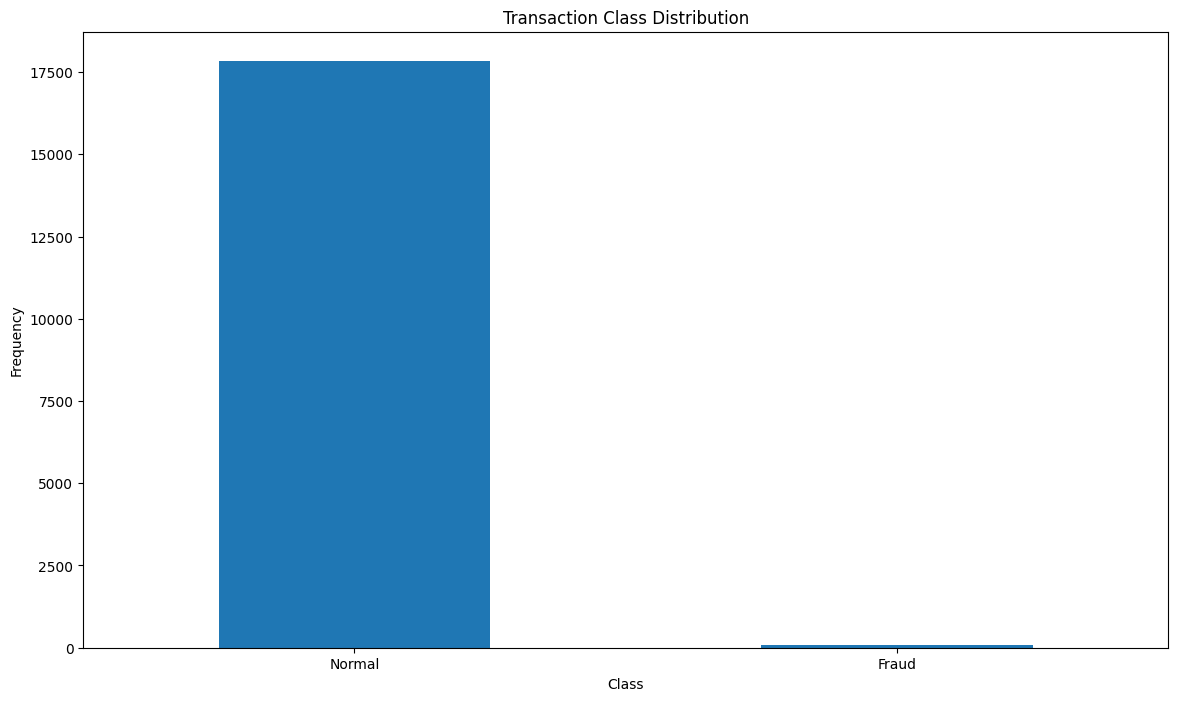

In [5]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [6]:
# Get the Fraud and the normal dataset

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [7]:
print(fraud.shape,normal.shape)

(81, 31) (17836, 31)


In [8]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count      81.000000
mean       98.105926
std       267.464067
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [9]:
normal.Amount.describe()

count    17836.000000
mean        67.365025
std        188.754429
min          0.000000
25%          5.490000
50%         15.950000
75%         56.232500
max       7712.430000
Name: Amount, dtype: float64

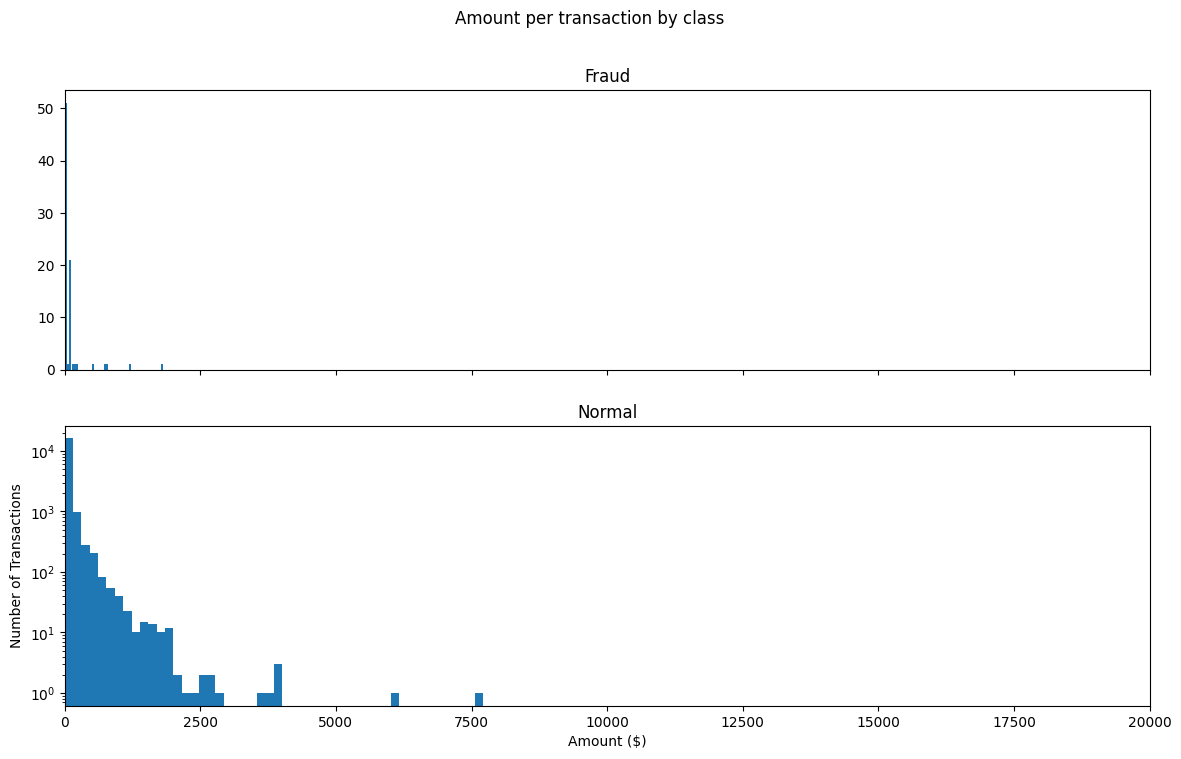

In [33]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

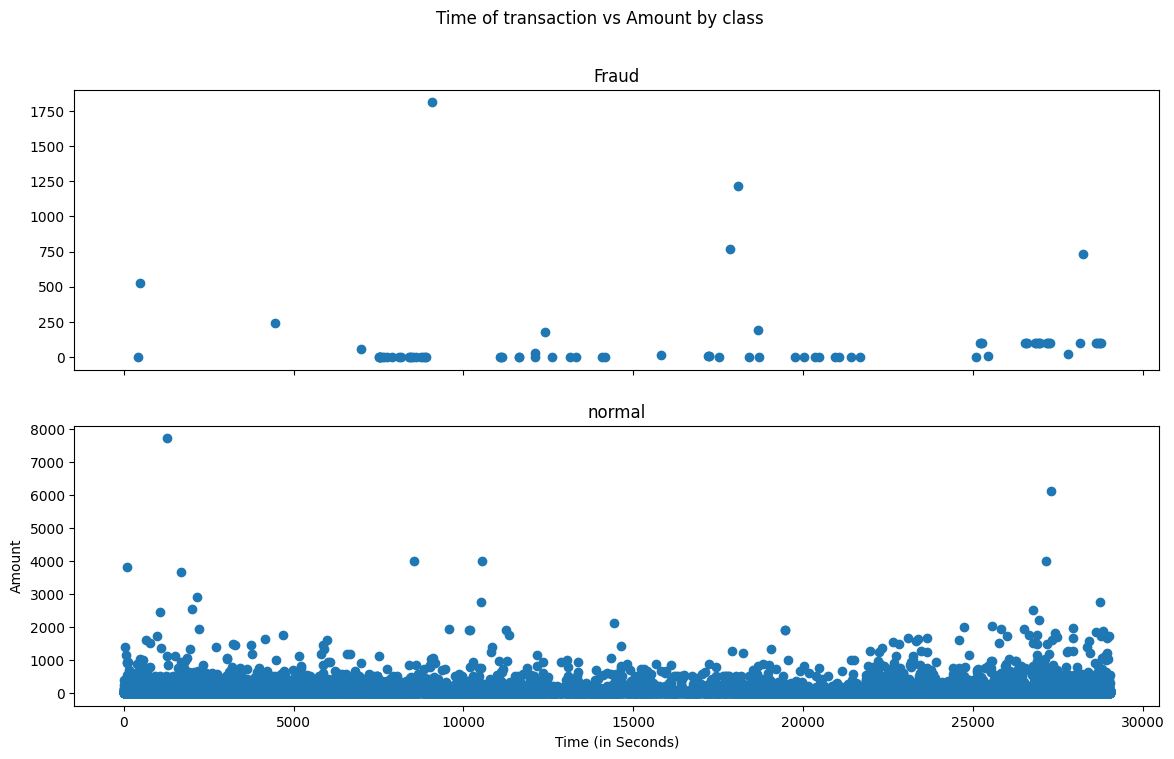

In [34]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [19]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(1792, 31)

In [20]:
data.shape

(17918, 31)

In [21]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [22]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.00392156862745098
Fraud Cases : 7
Valid Cases : 1785


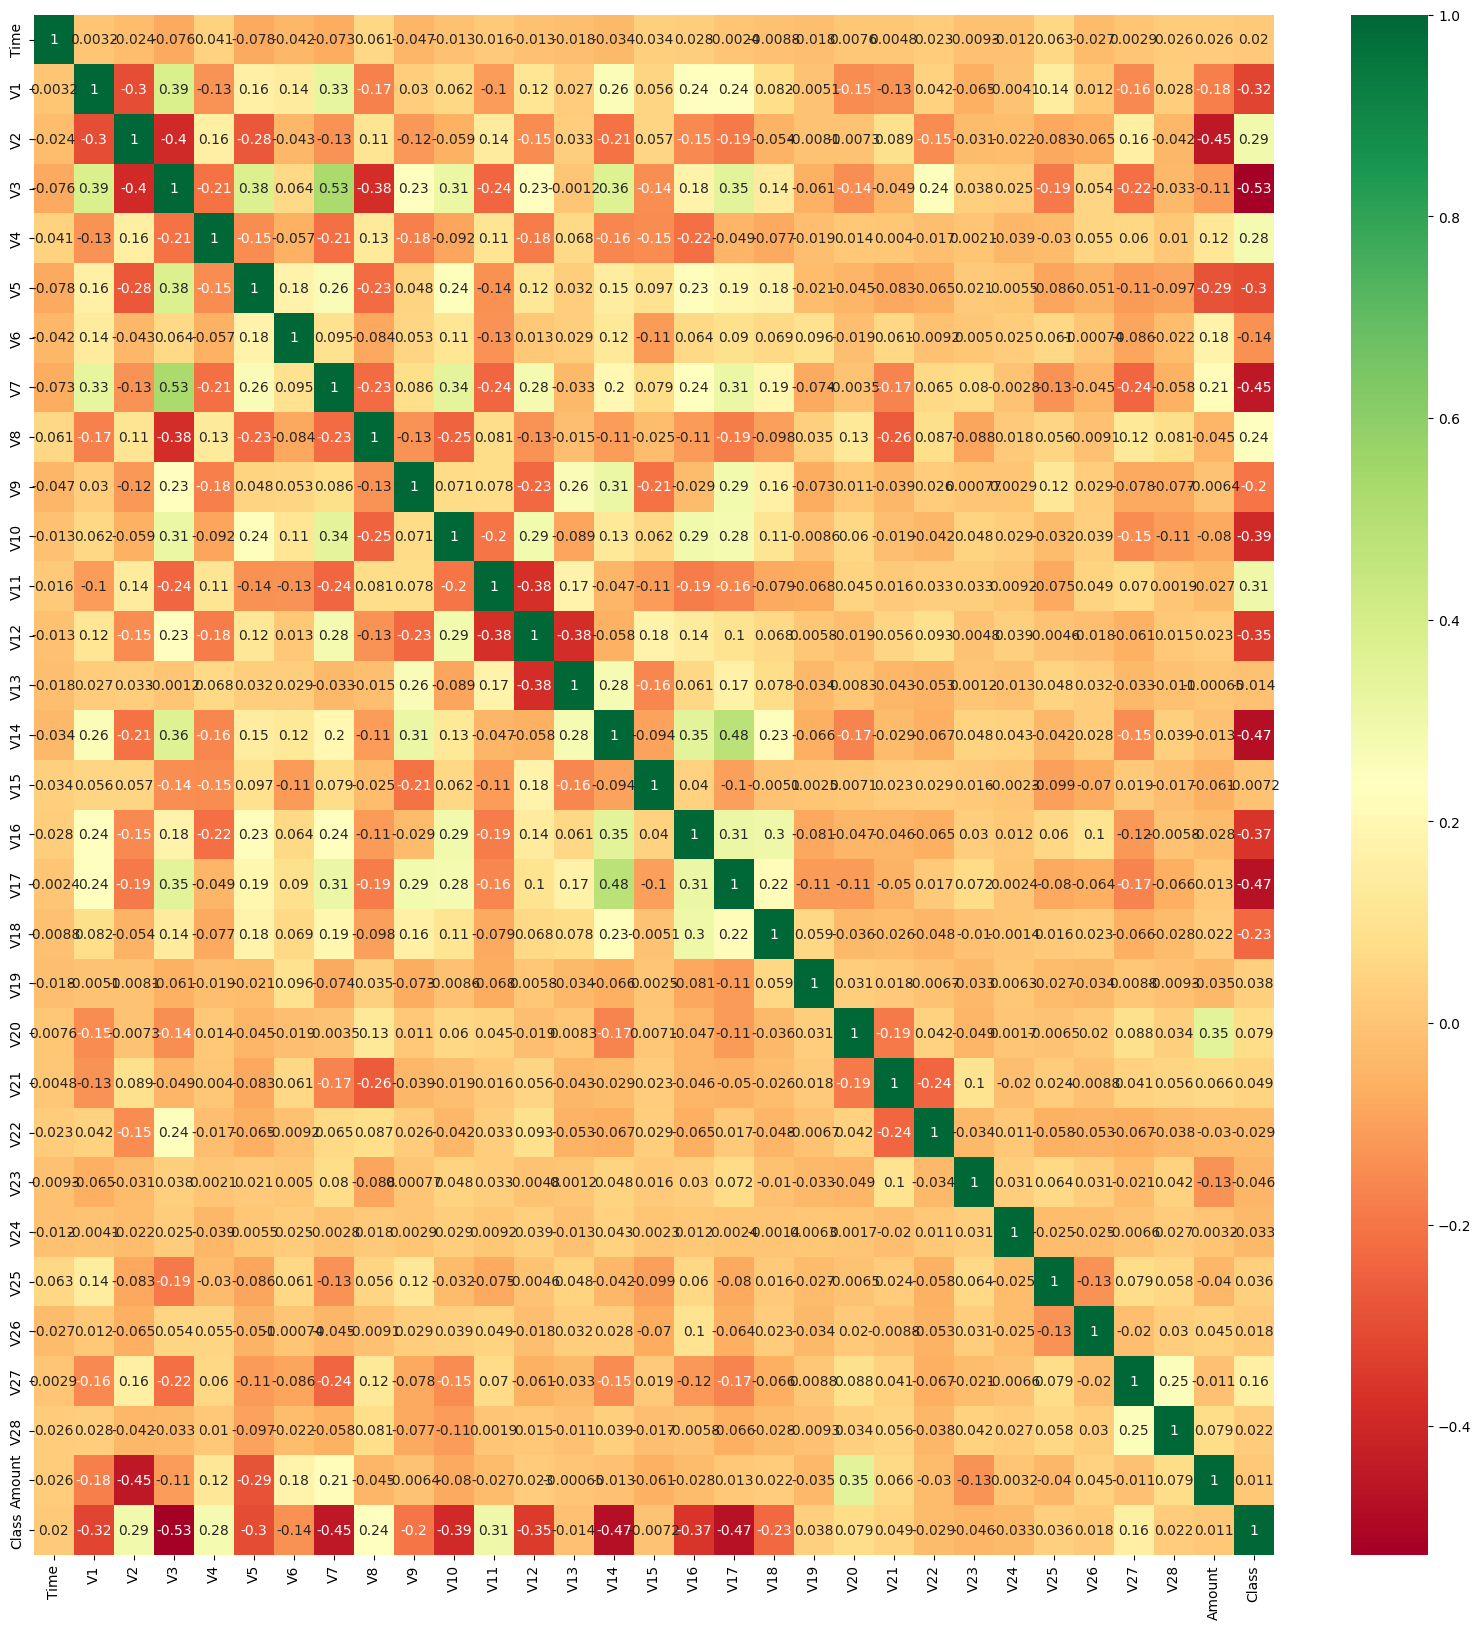

In [23]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [24]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(1792, 30)
(1792,)


Local Outlier Factor(LOF) Algorithm

In [44]:
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression

classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X),
                                        contamination=outlier_fraction, random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                               leaf_size=30, metric='minkowski',
                                               p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05,
                                          max_iter=-1),
    "Logistic Regression": LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0,
                                               fit_intercept=True, intercept_scaling=1,
                                               class_weight=None, random_state=None,
                                               solver='lbfgs', max_iter=100, multi_class='auto',
                                               verbose=0, warm_start=False, n_jobs=None, l1_ratio=None),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2),
    "Random Forest": RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                            min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,
                                            min_impurity_decrease=0.0, bootstrap=True,
                                            oob_score=False, n_jobs=None, random_state=None, verbose=0,
                                            warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
}


In [45]:
type(classifiers)

dict

In [47]:
from sklearn.metrics import classification_report, accuracy_score

n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        if clf_name == "Logistic Regression":
            clf.fit(X, Y)  # Fit logistic regression with target labels
            scores_prediction = clf.predict_proba(X)[:, 1]  # Use probability of being fraud as the outlier score
        elif clf_name == "K-Nearest Neighbors":
            clf.fit(X, Y)  # Fit KNN with target labels
            scores_prediction = 1 - clf.predict_proba(X)[:, 0]  # Use probability of being fraud as the outlier score
        elif clf_name == "Random Forest":
            clf.fit(X, Y)  # Fit Random Forest with target labels
            scores_prediction = clf.predict_proba(X)[:, 1]  # Use probability of being fraud as the outlier score
        else:
            clf.fit(X, Y)  # Fit other models with target labels if available
            scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)

    # Reshape the prediction values to 0 for Valid transactions, 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()

    # Run Classification Metrics
    print(f"{clf_name}: {n_errors}")
    print("Accuracy Score :")
    print(accuracy_score(Y, y_pred))
    print("Classification Report :")
    print(classification_report(Y, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 7
Accuracy Score :
0.99609375
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1785
         1.0       0.50      0.57      0.53         7

    accuracy                           1.00      1792
   macro avg       0.75      0.78      0.77      1792
weighted avg       1.00      1.00      1.00      1792

Local Outlier Factor: 15
Accuracy Score :
0.9916294642857143
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1785
         1.0       0.00      0.00      0.00         7

    accuracy                           0.99      1792
   macro avg       0.50      0.50      0.50      1792
weighted avg       0.99      0.99      0.99      1792

Support Vector Machine: 751
Accuracy Score :
0.5809151785714286
Classification Report :
              precision    recall  f1-score   support

         0.0       0.99      0.58      0.73   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

0.99609375
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1785
         1.0       0.00      0.00      0.00         7

    accuracy                           1.00      1792
   macro avg       0.50      0.50      0.50      1792
weighted avg       0.99      1.00      0.99      1792

K-Nearest Neighbors: 7
Accuracy Score :
0.99609375
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1785
         1.0       0.00      0.00      0.00         7

    accuracy                           1.00      1792
   macro avg       0.50      0.50      0.50      1792
weighted avg       0.99      1.00      0.99      1792



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest

Random Forest: 7
Accuracy Score :
0.99609375
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1785
         1.0       0.00      0.00      0.00         7

    accuracy                           1.00      1792
   macro avg       0.50      0.50      0.50      1792
weighted avg       0.99      1.00      0.99      1792



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2)
knn.fit(X, Y)
y_pred_knn = knn.predict(X)

# Initialize SVM model
svm = OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05, max_iter=-1)
svm.fit(X)
y_pred_svm = svm.predict(X)

# Combine predictions
y_pred_combined = (y_pred_knn + y_pred_svm) // 2  # Simple averaging of predictions

# Reshape the prediction values to 0 for Valid transactions, 1 for Fraud transactions
y_pred_combined[y_pred_combined == 1] = 0
y_pred_combined[y_pred_combined == -1] = 1

# Calculate accuracy
accuracy = accuracy_score(Y, y_pred_combined)

# Run Classification Metrics
print("Combined Model (KNN + SVM):")
print("Accuracy Score:")
print(accuracy)


Combined Model (KNN + SVM):
Accuracy Score:
0.5809151785714286


In [49]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

# Initialize Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                                       max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True,
                                       oob_score=False, n_jobs=None, random_state=None, verbose=0,
                                       warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
random_forest.fit(X, Y)
y_pred_rf = random_forest.predict(X)

# Initialize Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, max_samples=len(X), contamination=outlier_fraction,
                                   random_state=state)
isolation_forest.fit(X)
y_pred_if = isolation_forest.predict(X)

# Combine predictions
y_pred_combined = (y_pred_rf + y_pred_if) // 2  # Simple averaging of predictions

# Reshape the prediction values to 0 for Valid transactions, 1 for Fraud transactions
y_pred_combined[y_pred_combined == 1] = 0
y_pred_combined[y_pred_combined == -1] = 1

# Calculate accuracy
accuracy = accuracy_score(Y, y_pred_combined)

# Run Classification Metrics
print("Combined Model (Random Forest + Isolation Forest):")
print("Accuracy Score:")
print(accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Combined Model (Random Forest + Isolation Forest):
Accuracy Score:
0.9938616071428571
